In [1]:
# auto-reload edited modules
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, "/home/mmurakami/crios_backups/an_helper_functions")

# run the script into the curre nt kernel (vars/functions become available)
%run -i "/home/mmurakami/crios_backups/an_helper_functions/prep_grid_aste_90.py"

(450, 90)
RAC2d (40500,)
(100,)


In [2]:
# we need to load the miniaste

dirroot = "/scratch3/atnguyen/aste_90x150x60/"
dirgrid = dirroot + "GRID_real8/"
dirgridnb = dirroot + "GRID_noblank/"
runstr= "run_c68v_heffmosm3x_layers_lessmem1_viscAHp5em2_it0000_pk0000000001/"
layers_path = dirroot + runstr
extL = "LAYERS"
dirmask = dirroot + "run_template/input_maskTransport/"
dirbudg = layers_path + "diags/BUDG/"
dirdiags = dirbudg
dirstate = layers_path + "diags/STATE/"
dirlayers = layers_path + "diags/LAYERS/"
dirtrsp = layers_path + "diags/TRSP/"

In [4]:
# try to use rdmds
fileprefix = "/scratch3/atnguyen/aste_90x150x60/"
extBasin='run_template/input_maskTransport/'
filename = fileprefix + extBasin + "GATE_transports_v2_mskBasin.bin"
ind = np.fromfile(filename, dtype=np.int32)  # auto-reads .meta for shape/dtype/order
orig_shape = (ind.shape)

ind2d = ind.reshape(ny,nx)

mymsk = np.full((ny,nx),np.nan)
mymsk[ind2d == 57408.0] = 1

# make this smaller
mymsk[:,27:50] = np.nan
mymsk[:160,12:30] = np.nan
mymsk[160:163,15:30] = np.nan

ind = ind.reshape(ny,nx)
mymsk = np.full((ny,nx),np.nan)
mymsk[ind == 57408.0] = 1

# make this smaller
mymsk[:,27:50] = np.nan
mymsk[:160,12:30] = np.nan
mymsk[160:163,15:30] = np.nan

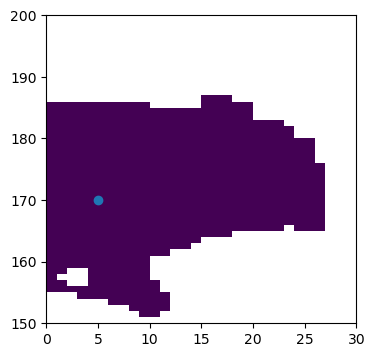

In [5]:
fig = plt.figure(figsize=(4,4))

plt.pcolormesh(mymsk)
plt.ylim(150,200)
plt.xlim(0,30)

# pick a random point
ix = 5
iy = 170
iz = 0  # surface point
iz = 14
plt.scatter(ix,iy)

In [6]:
# load the ADV terms for the Barents Sea for this singular box -- single box will all be contributing the same
# to the same T or S bin, so these will be the same when plotted in T or S space
# but we can show this anyways
tsstr = np.array(["0000000002","0000000003"])
t2 = int(tsstr[1]) # for the offline version

In [7]:
t2 = int(tsstr[1])
# 'diags/state_3d_set1'
# read theta and salt averages from the t2 timestep (average)
file_name = "state_3d_set1"
meta_state_3d_set1 = parsemeta(dirstate + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_state_3d_set1["fldList"])
varnames = np.array(["THETA","SALT"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
THETA,its,meta = rdmds(os.path.join(dirstate, file_name),t2,returnmeta=True,rec=recs[0])
SALT,its,meta = rdmds(os.path.join(dirstate, file_name),t2,returnmeta=True,rec=recs[1])

THETA = THETA.reshape(nz,ny,nx)
SALT = SALT.reshape(nz,ny,nx)

In [8]:
THETA[iz,iy,ix]
T

0.8844623565673828

In [9]:
THETA.shape

(50, 450, 90)

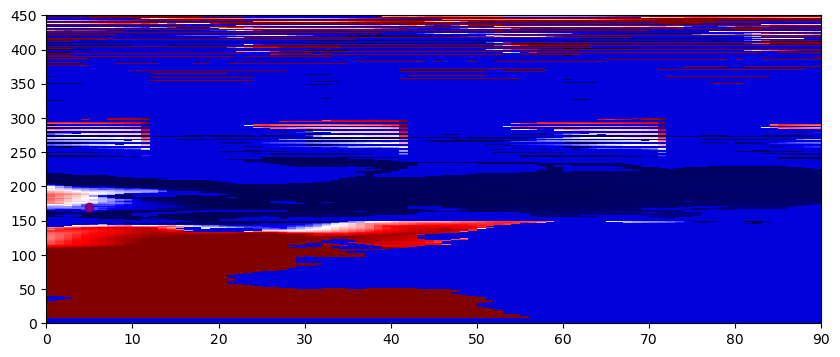

In [18]:
plt.pcolormesh(THETA[0],cmap='seismic',vmin=-2,vmax=8)
plt.scatter(ix,iy,c="purple")
# plt.xlim(0,30)
# plt.ylim(100,200)

In [12]:
# THETA_we = np.zeros((nz,ny,nx-1))
# (THETA_we[:,:,:-1] + THETA_we[:,:,1:])/2

In [14]:
print("cell",THETA[iz,iy,ix])
print("e",THETA[iz,iy,ix+1])
print("w",THETA[iz,iy,ix-1])
print("n",THETA[iz,iy+1,ix])
print("s",THETA[iz,iy-1,ix])

# print((THETA[iz,iy,ix+1]+THETA[iz,iy,ix]/)2)

cell 0.8844623565673828
e 0.8563541769981384
w 1.1480977535247803
n 0.7670218348503113
s 1.1754543781280518


In [20]:
tC = THETA[iz,iy,ix]
tE = (THETA[iz,iy,ix+1]+ tC)/2
tW = (THETA[iz,iy,ix-1] + tC)/2
tN = (THETA[iz,iy+1,ix] + tC)/2
tS = (THETA[iz,iy-1,ix] + tC)/2
print(tC)
print(tE,tW,tN,tS)

0.8844623565673828
0.8704082667827606 1.0162800550460815 0.825742095708847 1.0299583673477173


In [21]:
# load the TS bins
# also load the bins again so we have them locally
boundsT = np.round(np.squeeze(rdmds(layers_path + "layers2TH")).ravel(),1)
nT = boundsT.size - 1
boundsS = np.round(np.squeeze(rdmds(layers_path + "layers1SLT")).ravel(),1)
nS = boundsS.size - 1
binwidthT = boundsT[1:] - boundsT[:-1]
binwidthS = boundsS[1:] - boundsS[:-1]
binwidthT1 = 0.5 * (binwidthT[1:] + binwidthT[:-1])  # normalize by these
binwidthS1 = 0.5 * (binwidthS[1:] + binwidthS[:-1])
binmidT = (boundsT[1:] + boundsT[:-1]) /2    # bin to these
binmidS = (boundsS[1:] + boundsS[:-1]) /2
nT = nT
nS = nS
nTm1 = nT-1
nSm1 = nS-1

In [26]:
binmidT[6:12]

array([-0.4,  0. ,  0.4,  0.8,  1.1,  1.4])

In [28]:
boundsT.flatten()[5:12]

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ,  1.2])

In [33]:
file_name = "budg3d_hflux_set2"
meta_budg3d_hflux_set2 = parsemeta(dirdiags + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
varnames = np.array(["ADVx_TH","ADVy_TH","UVELMASS","VVELMASS"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
ADVx_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[0])
ADVy_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[1])
UVELMASS,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[2])
VVELMASS,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[3])


ADV_hconv = calc_UV_conv_mod(nfx, nfy,get_aste_faces(ADVx_TH.reshape(nz, ny, nx), nfx, nfy),get_aste_faces(ADVy_TH.reshape(nz, ny, nx), nfx, nfy))
ADV_hconv = ADV_hconv #* hf   # degC·m^3/s at cell centers (matches: ff.DFh = ff.DFh .* hf)
ADVhT = ADV_hconv

print(ADVhT[iz,iy,ix])

-8163.261099236346


In [50]:
ADVx_TH = ADVx_TH.reshape((nz,ny,nx))
ADVy_TH = ADVy_TH.reshape((nz,ny,nx))

In [51]:
print(ADVx_TH[iz,iy,ix])
print(-ADVx_TH[iz,iy,ix+1])
print(ADVy_TH[iz,iy,ix])
print(-ADVy_TH[iz,iy+1,ix]) # degC.m^3/s

print()

print(ADVx_TH[iz,iy,ix] + (-ADVx_TH[iz,iy,ix+1]) + ADVy_TH[iz,iy,ix] + (-ADVy_TH[iz,iy+1,ix]))

19157.69488487757
-19057.758970567615
-8288.2420502893
25.045036743000047

-8163.261099236346


In [52]:
# binmidT[0]

In [53]:
myT = tC
for i in range(nT-1):
    # print(tC)
    if myT >= binmidT[i]:
        if myT < binmidT[i+1]:
            iT = i
            print(iT)

9


In [54]:
M_N = np.full((nTm1),0)
M_W = np.full((nTm1),0)
M_E = np.full((nTm1),0)
M_S = np.full((nTm1),0)

In [55]:
M_N[iT] = -ADVy_TH[iz,iy+1,ix]
M_S[iT] = ADVy_TH[iz,iy,ix]
M_W[iT] = -ADVx_TH[iz,iy,ix+1]
M_E[iT] = ADVx_TH[iz,iy,ix]


In [67]:
print(M_N[9],M_S[9],M_W[9],M_E[9])

25 -8288 -19057 19157


In [68]:
print((M_N+M_S+M_E+M_W)[9])

-8163


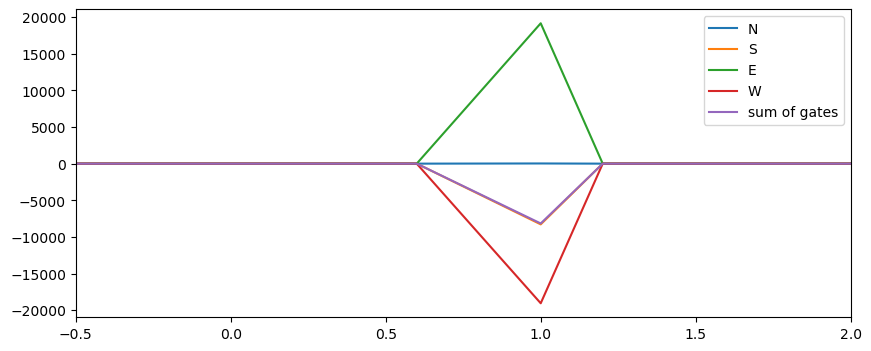

In [66]:
fig = plt.figure()

ax = plt.subplot(111)
ax.plot(boundsT.flatten()[1:-1],M_N,label="N")
ax.plot(boundsT.flatten()[1:-1],M_S,label="S")
ax.plot(boundsT.flatten()[1:-1],M_E,label="E")
ax.plot(boundsT.flatten()[1:-1],M_W,label="W")

ax.plot(boundsT.flatten()[1:-1],M_N+M_S+M_E+M_W,label="sum of gates")
ax.set_xlim(-.5,2)
ax.legend()